# DTSA 5510 - Unsupervised Algorithms in Machine Learning Final Project

### Step 1: Gather Data, Detemine the Method of Data Collection and Provenance of the Data

The data source that I've selected is a Food Delivery Order Dataset, containing detailed insights into food orders in an area. I expect this dataset to be able to provide valuable insights into customer behaviour and restaurant performance and efficiency.

This data was originally collected from the backend database of Zomato, an Indian multinational restaurant aggregator and food delivery company. To maintain privacy and anonyminity, the restaurant names have been modified. The remainder of the data has been left intact for authenticity.

The problem that I want to approach and solve is determining whether or not an unsupervised learning model can cluster/group restaurants together in terms of delivery order performance. This would gather useful insights, as food delivery companies tend to want to group restaurants in terms of different metrics, for the sake of offering suggestions to the app users (e.g. restaurants by overall price, by fastest delivery time, by overall rating, etc.).

### Step 2: Identify an Unsupervised Learning Problem

For this project; I'll focus on using three different unsupervised learning models and I'll evaluate their performance against each other for this task.

- Model #1 - K-Means Clustering (KMC)
- Model #2 - K-Nearest Neighbours
- Model #3 - Hierarchical Clustering

##### Problem and Objective:
Can we effectively group restaurants in meaningful clusters based on food delivery order history? The goal is to apply unsupervised learning techniques (Kmeans, DBSCAN, and Hierarchical Clustering) to analyze food delivery order data, identify meaningful customer segments, detect outliers or anomalies, and uncover patterns in order to optimize delivery efficiency and customer satisfaction. 

The problem that I want to approach and solve is determining whether or not an unsupervised learning model can cluster/group restaurants together in terms of delivery order performance. This would gather useful insights, as food delivery companies tend to want to group restaurants in terms of different metrics, for the sake of offering suggestions to the app users (e.g. restaurants by overall price, by fastest delivery time, by overall rating, etc.).


### Step 3: Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data
In this step, we'll explore and inspect the data factors/features, and make note of how to transform and clean the data in EDA Steps 3 and 4.

In [702]:
# import data and relevent packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster

data = pd.read_csv('order_history_kaggle_data.csv')

In [703]:
#Overview of Dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Restaurant ID                                       21321 non-null  int64  
 1   Restaurant name                                     21321 non-null  object 
 2   Subzone                                             21321 non-null  object 
 3   City                                                21321 non-null  object 
 4   Order ID                                            21321 non-null  int64  
 5   Order Placed At                                     21321 non-null  object 
 6   Order Status                                        21321 non-null  object 
 7   Delivery                                            21321 non-null  object 
 8   Distance                                            21321 non-null  object 


,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


#### 1. Factors and Components of the Dataset

The "factors" in this dataset are as follows:
- Restaurant ID (Integer)
- Restaurant name (String)
- Subzone (String)
- City (String)
- Order ID (Integer)
- Order Placed At (String)
- Order Status (String)
- Delivery (String)
- Distance (String)
- Items in order (String)
- Instructions (String)
- Discount construct (String)
- Bill subtotal (Float)
- Packaging charges (Float)
- Restaurant discount (Promo) (Float)
- Restaurant discount (Flat offs, Freebies & others) (Float)
- Gold discount (Float)
- Brand pack discount (Float)
- Total (Float)
- Rating (Float)
- Review (String)
- Cancellation / Rejection reason (String)
- Restaurant compensation (Cancellation) (Float)
- Restaurant penalty (Rejection) (Float)
- KPT duration (minutes) (Float)
- Rider wait time (minutes) (Float)
- Order Ready Marked (String)
- Customer complaint tag (String)
- Customer ID (String)

##### Data distribution of each factor:

Next, we'll use data visualizations to describe the data distributions.

We'll remove the Restaurant Name Factor later on. Explanation: We have a column called Restaurant ID that effectively encodes the restaurant name, so we don't need the extra string-based column.

In [708]:
# data.drop('Restaurant name')
data.drop(['Restaurant name'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Restaurant ID                                       21321 non-null  int64  
 1   Restaurant name                                     21321 non-null  object 
 2   Subzone                                             21321 non-null  object 
 3   City                                                21321 non-null  object 
 4   Order ID                                            21321 non-null  int64  
 5   Order Placed At                                     21321 non-null  object 
 6   Order Status                                        21321 non-null  object 
 7   Delivery                                            21321 non-null  object 
 8   Distance                                            21321 non-null  object 


##### Restaurant ID

In [710]:
print("The total number of restaurants represented in this dataset is: ", len(data['Restaurant ID'].unique()))

The total number of restaurants represented in this dataset is:  21


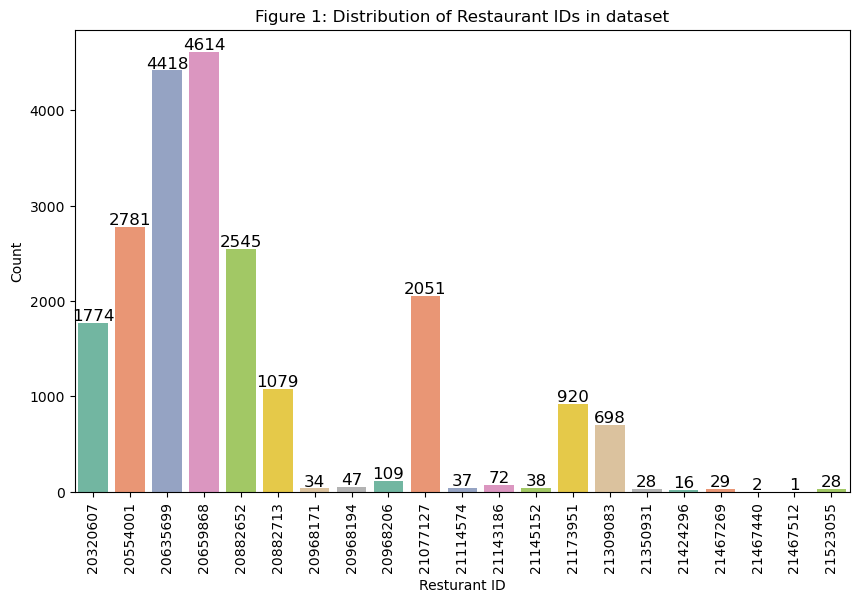

In [711]:
# Restaurant ID
RestaurantID_valuecounts = data['Restaurant ID'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=RestaurantID_valuecounts.index, y=RestaurantID_valuecounts.values, palette='Set2',legend=False, hue=RestaurantID_valuecounts.index)
    
# Set plot labels and title
plt.title('Figure 1: Distribution of Restaurant IDs in dataset')
plt.xlabel('Resturant ID')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability
for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')
plt.show()

From the data above, we can conclude that there is a huge imbalance between the restaurants represented in the dataset. Additional techniques may need to be applied here, depending on how well or poor the models perform as a result.

##### Subzone

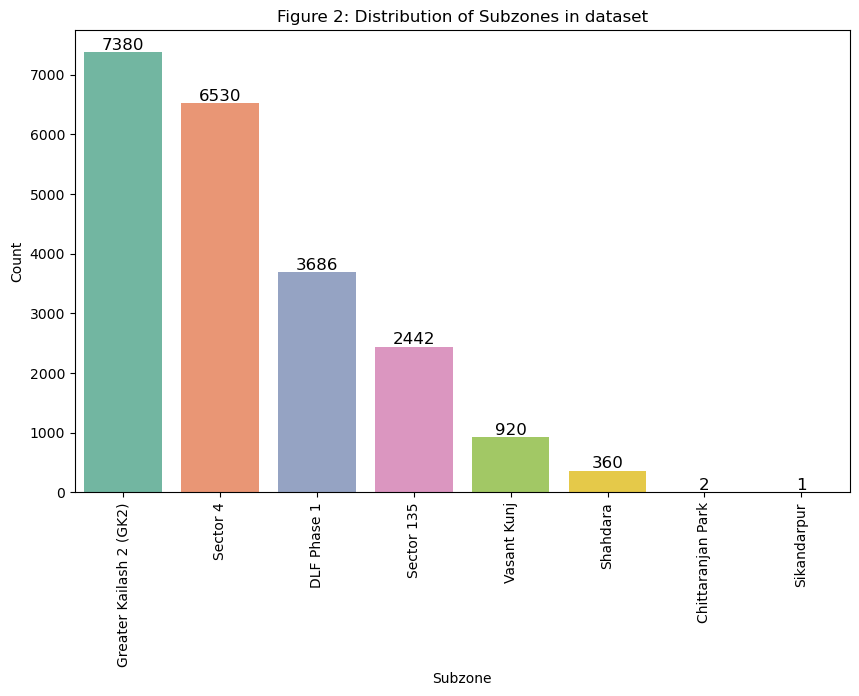

In [714]:
subzone_value_counts = data['Subzone'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=subzone_value_counts.index, y=subzone_value_counts.values, palette='Set2',legend=False, hue=subzone_value_counts.index)
    
# Set plot labels and title
plt.title('Figure 2: Distribution of Subzones in dataset')
plt.xlabel('Subzone')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability
for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

plt.show()

This is pretty clean. Let's make a note here to encode this factor so that we don't have to deal with strings.

##### City

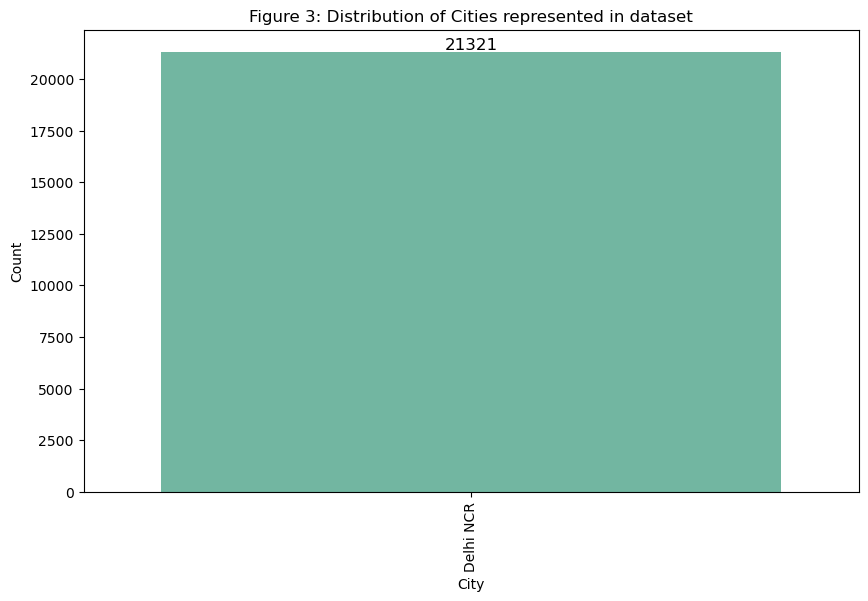

In [717]:
#City:
city_value_counts = data['City'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=city_value_counts.index, y=city_value_counts.values, palette='Set2',legend=False, hue=city_value_counts.index)
    
# Set plot labels and title
plt.title('Figure 3: Distribution of Cities represented in dataset')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability
for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')
plt.show()

Since there appears to be only one city represented in the dataset, we can remove this column as being redundant. It's also worth noting that the Subzones category (Figure 2), appear to accurately capture the geographical aspect of the deliveries, all within one city (Delhi NCR). Thus, by removing this factor/column from our dataset, we won't be losing any real information. 

##### Order ID

In [720]:
len(data['Order ID'].unique()) == len(data)

True

The above sanity check confirms that the values in the OrderID column are unique designators for the orders placed. While this may act as good reference points, we can assume that the values themselves don't hold any underlying information that may be pertinent to the model itself, and that this factor/column can be removed as well.

##### Order Status

In [723]:
data['Order Status'].unique()

array(['Delivered', 'Returned', 'Rejected', 'Return cancelled',
       'Picked up', 'Timed out'], dtype=object)

Seeing as the Order Status is a object (string) column with finite values that may be useful, we'll make a note here to encode these values into numerical labels, for the sake of easier modelling later on.

##### Delivery

In [726]:
data['Delivery'].unique()

array(['Zomato Delivery'], dtype=object)

Similar to the 'City' factor, this column is one-dimensional, and can be removed for redundancy.

##### Distance

In [729]:
data['Distance'].unique()

array(['3km', '2km', '<1km', '1km', '6km', '4km', '5km', '8km', '7km',
       '10km', '9km', '11km', '16km', '14km', '15km', '17km', '12km',
       '18km', '13km', '19km', '21km', '20km'], dtype=object)

For easier data understanding and modelling, let's encode this column into numerical labels as well. We'll encode it such that the integer represents the total kilometer distance (rounded to nearest whole value), so that we don't have to ask the models to handle these strings. (e.g. '<1km' = 0, '1km' = 1, '2km' = 2, etc.)

##### Items in order 

In [732]:
data['Items in order'].head()

0    1 x Grilled Chicken Jamaican Tender, 1 x Grill...
1    1 x Peri Peri Fries, 1 x Fried Chicken Angara ...
2                1 x Bone in Peri Peri Grilled Chicken
3    1 x Fried Chicken Ghostbuster Tender, 1 x Anga...
4    1 x Peri Peri Krispers, 1 x Fried Chicken Anga...
Name: Items in order, dtype: object

This column is strictly strings containing the items in order. It may be unnecessary, but including the number of items as an indicator of the size of hte order might be useful. Let's convert this column into a numerical column (int), to record the total number of items in the order.

##### Instructions

In [735]:
data['Instructions'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Instructions, dtype: object

Let's see how many orders actually have instructions attached to them:

In [737]:
data['Instructions'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Instructions
Non-Null Count  Dtype 
--------------  ----- 
720 non-null    object
dtypes: object(1)
memory usage: 166.7+ KB


Seeing as only 720 orders have non-null instructions, and that we can assume that the instructions per food order will be very specific and hold little predictive/analytical value overall. Thus, this column can be removed overall to reduce noise in the model.

##### Discount construct

In [740]:
data['Discount construct']

0         40% off upto Rs.80
1            Flat Rs.175 off
2         40% off upto Rs.80
3         40% off upto Rs.80
4         40% off upto Rs.80
                ...         
21316    50% off upto Rs.100
21317           Flat 15% off
21318                    NaN
21319                    NaN
21320    50% off upto Rs.100
Name: Discount construct, Length: 21321, dtype: object

Again, we find data that is heavily dependent on the restaurant, items being ordered, etc., that may introduce more noise. However, having discounts applied to the food orders may be influencing customers to order more from a given restaurant. It may be ideal to encode this in some other way to capture this information.
We'll encode this as a binary column; 1 to indicate that some srot of discount has been applied to the order, and 0 to imply not

##### Bill subtotal

In [743]:
data['Bill subtotal']

0         715.0
1        1179.0
2         310.0
3         620.0
4         584.0
          ...  
21316     510.0
21317     560.0
21318     430.0
21319     339.0
21320     380.0
Name: Bill subtotal, Length: 21321, dtype: float64

As expected, the Bill subtotal column reflects the bill subtotal prior to any discounts, etc., and is logically full of unique values. It's resonable to assume many of the columns containing information about totals and/or discounts are similar in format, and can be left alone, but we'll explore each one in more depth just in case.

##### Packaging charges 

In [746]:
data['Packaging charges']

0        31.75
1        50.20
2        11.50
3        27.00
4        25.20
         ...  
21316    21.00
21317    24.22
21318    21.50
21319    16.95
21320    14.50
Name: Packaging charges, Length: 21321, dtype: float64

Similar to Bill subtotal, this factor is mostly unique to the order, as we can see by checking for value counts.

In [748]:
data['Packaging charges'].value_counts()

Packaging charges
15.50    614
29.95    507
23.95    433
32.95    362
17.45    299
        ... 
57.55      1
61.12      1
21.64      1
52.24      1
62.53      1
Name: count, Length: 2727, dtype: int64

If it was unique to the restaurant (e.g. if each restaurant charged a flat fee for packaging), we would see the same number of unqiue values in this columns as there are unique restaurants in the dataset. It might be worth investigating a correlation here more in the next section.

##### Restaurant discount (Promo), Restaurant discount (Flat offs, Freebies & others), Gold discount and Brand pack discount 

In [751]:
data['Restaurant discount (Promo)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Restaurant discount (Promo)
Non-Null Count  Dtype  
--------------  -----  
21321 non-null  float64
dtypes: float64(1)
memory usage: 166.7 KB


In [752]:
data['Restaurant discount (Flat offs, Freebies & others)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Restaurant discount (Flat offs, Freebies & others)
Non-Null Count  Dtype  
--------------  -----  
21321 non-null  float64
dtypes: float64(1)
memory usage: 166.7 KB


In [753]:
data['Gold discount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Gold discount
Non-Null Count  Dtype  
--------------  -----  
21321 non-null  float64
dtypes: float64(1)
memory usage: 166.7 KB


In [754]:
data['Brand pack discount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Brand pack discount
Non-Null Count  Dtype  
--------------  -----  
21321 non-null  float64
dtypes: float64(1)
memory usage: 166.7 KB


These four factors are all float columns that may once again be specific to the order. It might be worth investigating any correlations amongst these values in the next section, but it's also reasonable to expect that dropping these values won't change much about the final model(s) performance(s).

##### Total

In [757]:
data.Total.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Total
Non-Null Count  Dtype  
--------------  -----  
21321 non-null  float64
dtypes: float64(1)
memory usage: 166.7 KB


We can again assume that this data is unique to the order, and it would probably be best to assess this factor in correlation with other factors. However, let's see what the range of this column is:

In [759]:
print("Range of Total factor:")
print("Minimum = ", data.Total.min())
print("Maximum = ", data.Total.max())
print("Total Range = ", data.Total.max() - data.Total.min())

Range of Total factor:
Minimum =  52.5
Maximum =  12663.0
Total Range =  12610.5


##### Rating

In [761]:
data.Rating.info()
data.Rating.unique()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
2491 non-null   float64
dtypes: float64(1)
memory usage: 166.7 KB


array([nan,  4.,  5.,  2.,  1.,  3.])

Rating seems to already be in a somewhat usable format. Let's make a note to transform this data into cleaner integers (e.g. 1, 2, 3, etc.), and use 0 as an indicator that a rating wasn't given, versus being missing and removing the information entirely.

##### Review

In [764]:
data.Review.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Review
Non-Null Count  Dtype 
--------------  ----- 
296 non-null    object
dtypes: object(1)
memory usage: 166.7+ KB


Out of the 21321 records in this dataset, only 296 these orders have Ratings on them. That's effectively ~1% of the data. We can most likely remove this column to prevent noise, but let's see if there's a correlation between this column and the Rating column first.

##### Cancellation / Rejection reason

In [767]:
data['Cancellation / Rejection reason'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Cancellation / Rejection reason
Non-Null Count  Dtype 
--------------  ----- 
186 non-null    object
dtypes: object(1)
memory usage: 166.7+ KB


Similar to above, only 186 records in the dataset have a Cancellation / Rejection reason. Again, that's less than 1% of the data. Moreover this column is an object (string) column, that may not hold much useful information.
For the sake of removing potential noise, let's make a note to remove this column from the dataset.

##### Restaurant compensation (Cancellation) 

In [770]:
data['Restaurant compensation (Cancellation)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Restaurant compensation (Cancellation)
Non-Null Count  Dtype  
--------------  -----  
133 non-null    float64
dtypes: float64(1)
memory usage: 166.7 KB


Similar to above, this is very little data (<1%), and can most likely be removed without penalty.

##### Restaurant penalty (Rejection)

In [773]:
data['Restaurant penalty (Rejection)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Restaurant penalty (Rejection)
Non-Null Count  Dtype  
--------------  -----  
3 non-null      float64
dtypes: float64(1)
memory usage: 166.7 KB


Again, this is only three records out of the total dataset; this column can be removed.

##### KPT duration (minutes) 
Note from dataset source: KPT = Kitchen Preparation Time. E.g. total amount of time it takes the restaurant's kitchen to prepare the order.

In [776]:
data['KPT duration (minutes)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: KPT duration (minutes)
Non-Null Count  Dtype  
--------------  -----  
21026 non-null  float64
dtypes: float64(1)
memory usage: 166.7 KB


Let's leave this column alone for now, and assess it in correlation with the the Restaurant ID and the size of the order that we'll derive from the Items In Order Factor.

##### Rider wait time (minutes)

In [779]:
data['Rider wait time (minutes)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Rider wait time (minutes)
Non-Null Count  Dtype  
--------------  -----  
21153 non-null  float64
dtypes: float64(1)
memory usage: 166.7 KB


Similar to above, let's assess this with regards to other factors in the next section.

##### Order Ready Marked
Note from dataset source: Indicates whether the order was marked ready correctly

In [782]:
data['Order Ready Marked'].unique()

array(['Correctly', 'Incorrectly', 'Missed'], dtype=object)

Although we can probably derive more insights by investigating the correlation between this factor and the KPT and Rider Wait Time factors, let's view these labels more closely:

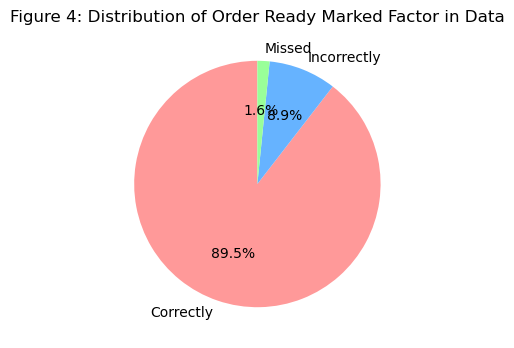

In [784]:
order_ready_marked_counts = data['Order Ready Marked'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(order_ready_marked_counts,labels = order_ready_marked_counts.index,autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Figure 4: Distribution of Order Ready Marked Factor in Data')
plt.show()


##### Customer complaint tag
Note from data source: Indicates any complaints made by customers.

In [786]:
data['Customer complaint tag'].info()
data['Customer complaint tag'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Customer complaint tag
Non-Null Count  Dtype 
--------------  ----- 
469 non-null    object
dtypes: object(1)
memory usage: 166.7+ KB


array([nan, 'Poor taste or quality', 'Non-refunded complaint',
       'Poor packaging or spillage', 'Item(s) missing or not delivered',
       'Wrong item(s) delivered'], dtype=object)

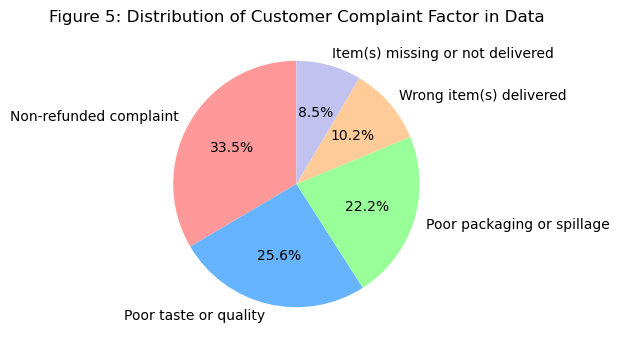

In [787]:
complaint_counts = data['Customer complaint tag'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(complaint_counts,labels = complaint_counts.index,autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Figure 5: Distribution of Customer Complaint Factor in Data')
plt.show()

It's worht nothing that only ~2.2% of records in the data have customer complaints. It might be worth it to encode this data, based on the problem/domain-space.
Let's make a note to encode this data (including replacing the nan's, so that orders without complaints are probably encoded as well.

##### Customer ID
Customer ID is expected to be somewhat unique, and may also introduce noise into the models.

In [790]:
data['Customer ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21321 entries, 0 to 21320
Series name: Customer ID
Non-Null Count  Dtype 
--------------  ----- 
21321 non-null  object
dtypes: object(1)
memory usage: 166.7+ KB


In [791]:
len(data['Customer ID'].unique()) == len(data)

False

There is some repeat customers in the dataset, as expected. Let's investigate further.

In [793]:
data['Customer ID'].head()

0    5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1    0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2    f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3    1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4    d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...
Name: Customer ID, dtype: object

This data is incredible noisy. Let's encode this with simpler numerical labels, and produce a scatter plot to see how many repeat customers we have.
We'll use a hash function to generate some unique identifiers, and I'll do this first so that we can generate a plot immediately.

In [795]:
def mask_values_to_numeric(df, column):
    """
    This function takes a DataFrame and a column name, and converts each unique value in the
    specified column into a numeric identifier.
    
    Args:
    df (pandas.DataFrame): The input DataFrame
    column (str): The column name that contains the noisy data to be masked
    
    Returns:
    pandas.DataFrame: DataFrame with the specified column replaced by numeric identifiers
    """
    # Create a mapping from unique values in the column to numeric identifiers
    value_map = {val: idx for idx, val in enumerate(df[column].unique())}
    
    # Apply the mapping to the column
    df[column] = df[column].map(value_map)
    
    return df
df = mask_values_to_numeric(data, 'Customer ID')
df['Customer ID']

0            0
1            1
2            2
3            3
4            4
         ...  
21316    11604
21317    11605
21318     2211
21319    11606
21320    11045
Name: Customer ID, Length: 21321, dtype: int64

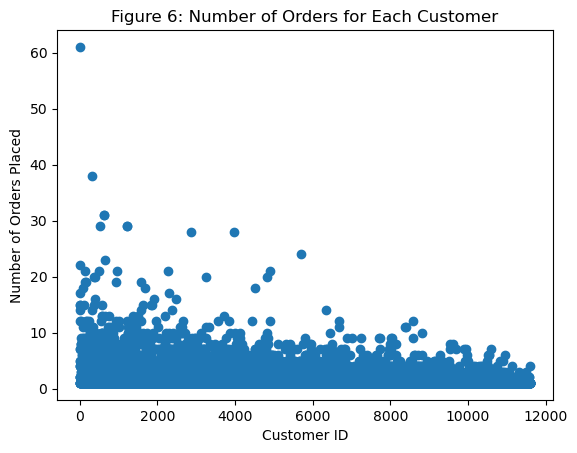

In [796]:
# Create a scatter plot with customerID and the number of records
customer_counts = df['Customer ID'].value_counts()

# Scatter plot
plt.scatter(customer_counts.index, customer_counts.values)

# Adding labels and title
plt.title("Figure 6: Number of Orders for Each Customer")
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders Placed")

# Show the plot
plt.show()

So it appears there are at least a handful of customers that are anomalies; they have a massive number of orders (e.g. over 20, some over 30, etc.) Let's make a note to analyze this later on when we discuss anomalies and outliers.

#### 2. Data Transformations

Before we get to analyzing data correlation, let's transform the data accordingly, so that we can investigate it further. We identified a few data transformations that we wanted to make in the previous section:
1. Encode Subzone factor (8 labels)
2. Mask Order Status (6)
3. Mask Distance
4. Count number of items in Items In Order Factor and transform into int values
5. Mask Discount Construct Factor
6. Mask Rating (turn nan value into 0 to indicate that no rating was given)
7. Mask Review column (binary)

We'll do these transformations below:

In [800]:
#Write a function for one-hot encoding:
def one_hot_encode(df, column_name):
    """
    One-hot encodes the specified categorical column in the dataframe.
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing the 'Subzone' column.
    - column_name (str): The name of the column to encode.
    
    Returns:
    - pd.DataFrame: The dataframe with the original column replaced by one-hot encoded columns.
    """
    # Apply one-hot encoding using pandas `get_dummies()`
    encoded_df = pd.get_dummies(df, columns=[column_name], drop_first=False)    
    return encoded_df

In [801]:
#Encode Subzone via one hot encoding.
df_transformed_1 = one_hot_encode(data,'Subzone')
df_transformed_1.columns

Index(['Restaurant ID', 'Restaurant name', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID', 'Subzone_Chittaranjan Park',
       'Subzone_DLF Phase 1', 'Subzone_Greater Kailash 2 (GK2)',
       'Subzone_Sector 135', 'Subzone_Sector 4', 'Subzone_Shahdara',
       'Subzone_Sikandarpur', 'Subzone_Vasant Kunj'],
      dtype='object')

In [802]:
#Encode the "Order Ready Marked" column.
df_transformed_2 = one_hot_encode(df_transformed_1,'Order Ready Marked')
df_transformed_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 38 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Restaurant ID                                       21321 non-null  int64  
 1   Restaurant name                                     21321 non-null  object 
 2   City                                                21321 non-null  object 
 3   Order ID                                            21321 non-null  int64  
 4   Order Placed At                                     21321 non-null  object 
 5   Order Status                                        21321 non-null  object 
 6   Delivery                                            21321 non-null  object 
 7   Distance                                            21321 non-null  object 
 8   Items in order                                      21321 non-null  object 


In [803]:
#Mask Distance column into more valuable integers:
def mask_distance_column(df, column_name="Distance"):
    """
    Converts the categorical 'Distance' column from string (e.g., '3km') to numerical values (e.g., 3).
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing the 'Distance' column.
    - column_name (str): The name of the column to convert (default is 'Distance').
    
    Returns:
    - pd.DataFrame: The dataframe with the 'Distance' column converted to numeric values.
    """
    # Replace '<1km' with a small value (e.g., 0.0)
    df[column_name] = df[column_name].replace('<1km', '0km')
    
    # Remove the 'km' suffix and convert to numeric (float or integer)
    df[column_name] = df[column_name].str.replace('km', '').astype(float)
    
    return df

In [804]:
df_transformed_3 = mask_distance_column(df_transformed_2,"Distance")

In [805]:
#Count the number of items in each order so that we can turn that column into int values.
def count_items_in_order(df, column_name="Items in order"):
    """
    Counts the number of items in each order and updates the dataframe with the count.
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing the 'Items in order' column.
    - column_name (str): The name of the column to process (default is 'Items in order').
    
    Returns:
    - pd.DataFrame: The dataframe with the 'Items in order' column replaced by the count of items.
    """
    # Count the number of items in each order by splitting by commas and measuring the length of the resulting list
    df[column_name] = df[column_name].apply(lambda x: len(x.split(',')))
    
    return df

In [806]:
df_transformed_4 = count_items_in_order(df_transformed_3)
df_transformed_4['Items in order']

0        2
1        3
2        1
3        2
4        2
        ..
21316    1
21317    1
21318    1
21319    1
21320    1
Name: Items in order, Length: 21321, dtype: int64

In [807]:
#Mask Discount construct factor. An order with a discount applied will be masked as "True" in this column, and False otherwise.
def mask_discount_column(df, column_name="Discount construct"):
    """
    Masks the 'Discount construct' column: NaN or missing values will be marked as False, 
    and any non-null string values will be marked as True.
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing the 'Discount construct' column.
    - column_name (str): The name of the column to mask (default is 'Discount construct').
    
    Returns:
    - pd.DataFrame: The dataframe with the 'Discount construct' column replaced by Boolean values (True or False).
    """
    # Apply mask: True for non-null strings, False for NaN or missing values
    df[column_name] = df[column_name].apply(lambda x: True if isinstance(x, str) and pd.notna(x) else False)
    
    return df

In [808]:
df_transformed_5 = mask_discount_column(df_transformed_4)

In [809]:
#Encode Rating column, replace nans with 0
def mask_rating_column(df, column_name="Rating"):
    """
    Masks the 'Rating' column: NaN values will be replaced with 0, and the remaining ratings 
    (4, 5, 2, 1, 3) will be converted to integers.
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing the 'Rating' column.
    - column_name (str): The name of the column to mask (default is 'Rating').
    
    Returns:
    - pd.DataFrame: The dataframe with the 'Rating' column replaced by integers, with NaN replaced by 0.
    """
    # Replace NaN values with 0 and convert to integers
    df[column_name] = df[column_name].fillna(0).astype(int)
    
    return df

In [810]:
df_transformed_6 = mask_rating_column(df_transformed_5)

In [813]:
def mask_review_column(df, column_name="Review"):
    """
    Masks the 'Review' column: NaN values will be replaced with 0, 
    and any non-null string values will be marked as 1.
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing the 'Review' column.
    - column_name (str): The name of the column to mask (default is 'Review').
    
    Returns:
    - pd.DataFrame: The dataframe with the 'Review' column replaced by boolean values (0 or 1).
    """
    # Replace NaN values with 0 and any non-null strings with 1
    df[column_name] = df[column_name].apply(lambda x: 0 if pd.isna(x) else 1)
    
    return df

In [815]:
df_transformed_7 = mask_review_column(df_transformed_6)
data_transformed = df_transformed_7

#### 3. Correlations between Factors

From our overall analysis in EDA Step 1, we identified a few factors of interest, and we want to investigate the following correlations:
1. Restaurant discount (Promo), Restaurant discount (Flat offs, Freebies & others), Gold discount and Brand pack discount with Total
2. Items Per Order and Total


##### Correlation 1: 

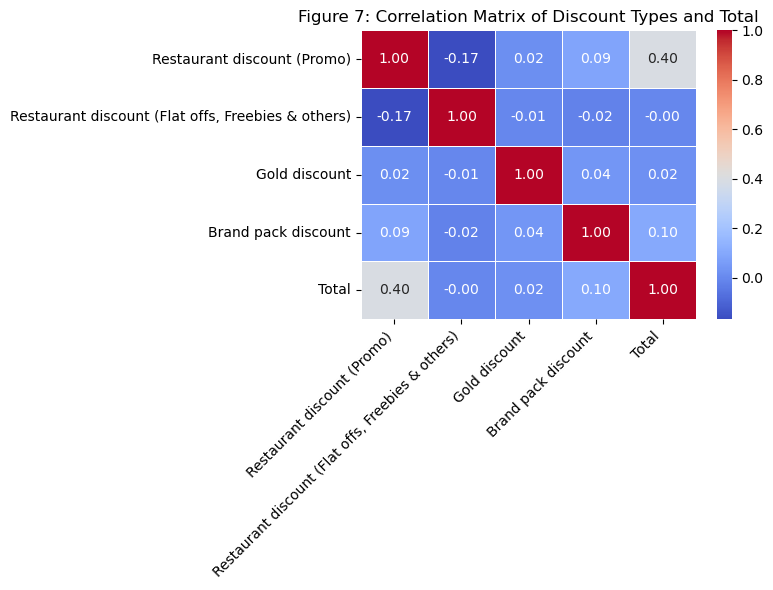

In [820]:
corr_data_1 = data_transformed[['Restaurant discount (Promo)', 'Restaurant discount (Flat offs, Freebies & others)','Gold discount','Brand pack discount','Total']]
correlation_matrix_1 = corr_data_1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Figure 7: Correlation Matrix of Discount Types and Total')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
    
# Show the plot
plt.tight_layout()
plt.show()


Surprisingly, we don't see a huge correlation between the discounts provided and the total in this case. It seems like these could be independent variables altogehter.

In [822]:
data_transformed.columns

Index(['Restaurant ID', 'Restaurant name', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Customer complaint tag', 'Customer ID',
       'Subzone_Chittaranjan Park', 'Subzone_DLF Phase 1',
       'Subzone_Greater Kailash 2 (GK2)', 'Subzone_Sector 135',
       'Subzone_Sector 4', 'Subzone_Shahdara', 'Subzone_Sikandarpur',
       'Subzone_Vasant Kunj', 'Order Ready Marked_Correctly',
       'Order Ready Marked_Incorrectly', 'Order Ready Marked_Missed'],
      dtype='object')

##### Correlation 2: 

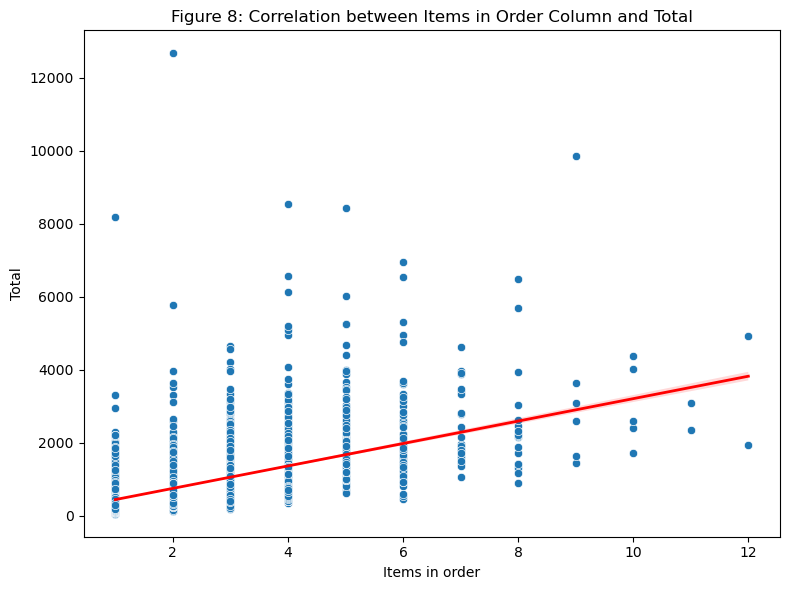

In [826]:
corr_data_2 = data_transformed['Items in order'].corr(data_transformed['Total'])
    
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

X = data_transformed['Items in order']
Y = data_transformed['Total']
# Create the scatter plot
sns.scatterplot(x=X, y=Y)

# Add a regression line (optional, to visualize trends)
sns.regplot(x=X, y=Y, scatter=False, color='red', line_kws={"linewidth": 2})

# Set the title and labels
plt.title(f"Figure 8: Correlation between Items in Order Column and Total")
plt.xlabel("Items in order")
plt.ylabel("Total")

# Show the plot
plt.tight_layout()
plt.show()


While there is a slight general positive trend between the number of items in an order and the total amount, it appears to be a very wide trend overall, not really indicating a linear relation as previous hypothesized.  

#### 4. Finalized Data Cleaning

##### Clean-up

Finally, we'll go ahead and remove the columns that we identified as being unnecessary, redundant and/or noisy.


In [831]:
data_transformed.columns

Index(['Restaurant ID', 'Restaurant name', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Customer complaint tag', 'Customer ID',
       'Subzone_Chittaranjan Park', 'Subzone_DLF Phase 1',
       'Subzone_Greater Kailash 2 (GK2)', 'Subzone_Sector 135',
       'Subzone_Sector 4', 'Subzone_Shahdara', 'Subzone_Sikandarpur',
       'Subzone_Vasant Kunj', 'Order Ready Marked_Correctly',
       'Order Ready Marked_Incorrectly', 'Order Ready Marked_Missed'],
      dtype='object')

In [833]:
data_cleaned_1 = data_transformed.drop(columns=["Restaurant name",
"City",
"Order ID",
"Order Placed At",
"Delivery",
"Instructions",
"Restaurant discount (Promo)",
'Restaurant discount (Flat offs, Freebies & others)',
"Gold discount",
'Brand pack discount',
'Cancellation / Rejection reason',
'Restaurant compensation (Cancellation)',
'Restaurant penalty (Rejection)',
'Customer ID'])

In [835]:
data_cleaned_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Restaurant ID                    21321 non-null  int64  
 1   Order Status                     21321 non-null  object 
 2   Distance                         21321 non-null  float64
 3   Items in order                   21321 non-null  int64  
 4   Discount construct               21321 non-null  bool   
 5   Bill subtotal                    21321 non-null  float64
 6   Packaging charges                21321 non-null  float64
 7   Total                            21321 non-null  float64
 8   Rating                           21321 non-null  int32  
 9   Review                           21321 non-null  int64  
 10  KPT duration (minutes)           21026 non-null  float64
 11  Rider wait time (minutes)        21153 non-null  float64
 12  Customer complaint

### Step 4: Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions

In [838]:
# Data Split:
#Split dataset into train (60%), eval (20%), and test (20%) sets

X_train, X_temp = train_test_split(data_cleaned_1, test_size=0.4, random_state=42)
X_eval, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

In [ ]:
# Split the data into train (60%), eval (20%), and test (20%) sets
X_train, X_temp = train_test_split(data, test_size=0.4, random_state=42)
X_eval, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

# Standardize the features for KMeans and Hierarchical Clustering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)
X_test_scaled = scaler.transform(X_test)

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_scaled)

# Predict cluster labels for the test set
kmeans_pred = kmeans.predict(X_test_scaled)

# Calculate Silhouette Score for K-Means (on test set)
kmeans_silhouette = silhouette_score(X_test_scaled, kmeans_pred)
print(f'K-Means Clustering Silhouette Score: {kmeans_silhouette:.3f}')

# 2. K-Nearest Neighbors for clustering (Using KNN for unsupervised learning)
# Use KNN to predict the closest point in the feature space for each point in the test set.
# Here we will use KNN for "nearest neighbors" without supervised labels (unsupervised context).

from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=3)
knn.fit(X_train_scaled)

# Find nearest neighbors in the test set
knn_distances, knn_indices = knn.kneighbors(X_test_scaled)

# Calculate Silhouette Score for KNN clustering (using the distances to the nearest neighbors)
knn_silhouette = silhouette_score(X_test_scaled, knn_indices.flatten())  # Flattening for silhouette
print(f'K-Nearest Neighbors Silhouette Score: {knn_silhouette:.3f}')

# 3. Hierarchical Clustering
# Perform Agglomerative Hierarchical Clustering using the 'ward' method
Z = linkage(X_train_scaled, method='ward')

# Predict cluster labels using a cutoff on the hierarchical clustering
hc_pred = fcluster(Z, t=3, criterion='maxclust')

# Calculate Silhouette Score for Hierarchical Clustering (on test set)
hc_silhouette = silhouette_score(X_test_scaled, hc_pred)
print(f'Hierarchical Clustering Silhouette Score: {hc_silhouette:.3f}')

K-Means Clustering Silhouette Score: 0.425
K-Nearest Neighbors Silhouette Score: 0.348
Hierarchical Clustering Silhouette Score: 0.412

#### Evaluation: 

#### References

Dataset: https://www.kaggle.com/datasets/sujalsuthar/food-delivery-order-history-data